# Classification case - telemarketing

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay

import time
import math

## Data - Telemarketing case

A popular strategy in direct marketing is the telemarketing phonecalls; even if this kind of intervention is a low-cost alternative, the sucess of its implementation relies in the propper targeting of potential clients.

The following dataset provide information on the the success of telemarketing calls for selling a particular bank product. The dataset contains different features types. Namely:

Client information:
- age: Age of the potential client
- job: admin., blue- collar, entrepreneur, housemaid...
- marital_status: married, single, unknown
- education:basic.4y,basic.6y,basic.9y,high.school,illiterate,...

Client-Bank Relation
- default: The client has credit in default: no,yes,unknown 
- housing: The client has a housing loan contract: no,yes,unknown
- loan: categorical	The client has a personal loan: no,yes,unknown

Campain
- contact: Communication type (cellular,telephone)
- month: Last month contacted (jan, feb ,..., dec)
- day_of_week: Last contact day : (mon, tue,..., fri)  
- duration: Last contact duration (in seconds)
- campain:Number of contacts performed during this campaign
- pdays:of days that passed by after last contact (999 if the client was not previously contacted)
- previous: Number of contacts performed before this campaign
- poutcome: Outcome of the previous marketing campaign: failure,nonexistent,success

Economic indicators
- emp.var.rate: numerical	Employment variation rate in the last quarter 
- cons.price.idx: numerical	Consumer price index in the last month
- cons.conf.idx: numerical	Monthly consumer confidence index
- euribor3m: numerical	Dayly Euro Interbank Offered Rate
- nr.employed: numerical	Number of employees in the last quarter


### Import data

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/telemarketing.csv')


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
3,32,management,single,university.degree,no,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,32,technician,single,university.degree,no,yes,yes,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
3,32,management,single,university.degree,no,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,32,technician,single,university.degree,no,yes,yes,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,51,admin.,married,basic.6y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
14996,53,housemaid,married,basic.4y,unknown,no,no,cellular,jul,tue,...,20,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
14997,41,management,married,unknown,no,yes,no,cellular,may,fri,...,5,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0
14998,34,admin.,single,university.degree,no,yes,no,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0


### Split Train/Test sets

In [6]:
X=df.iloc[:,:-1]
y=df['target']

In [7]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 321) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(10500, 20) (4500, 20)


### Split categorical/continuos variables

In [9]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [10]:
X_train_categorical=X_train.select_dtypes(include=['object'])
X_test_categorical=X_test.select_dtypes(include=['object'])

X_train_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
10019,retired,divorced,professional.course,no,no,no,cellular,oct,tue,nonexistent
11405,admin.,married,university.degree,unknown,yes,no,telephone,jun,mon,nonexistent
10536,blue-collar,married,basic.4y,no,yes,no,cellular,jul,thu,nonexistent
2899,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,wed,nonexistent
7218,admin.,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent


In [11]:
X_train_numerical=X_train.select_dtypes(include=[np.number])
X_test_numerical=X_test.select_dtypes(include=[np.number])

X_train_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
10019,69,144,1,999,0,-3.4,92.431,-26.9,0.744,5017.5
11405,40,417,1,999,0,1.4,94.465,-41.8,4.865,5228.1
10536,30,347,5,999,0,1.4,93.918,-42.7,4.962,5228.1
2899,55,171,1,999,0,1.1,93.994,-36.4,4.859,5191.0
7218,53,142,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Categorical data

In [12]:
print(X_train_categorical.shape)
print(X_test_categorical.shape)

(10500, 10)
(4500, 10)


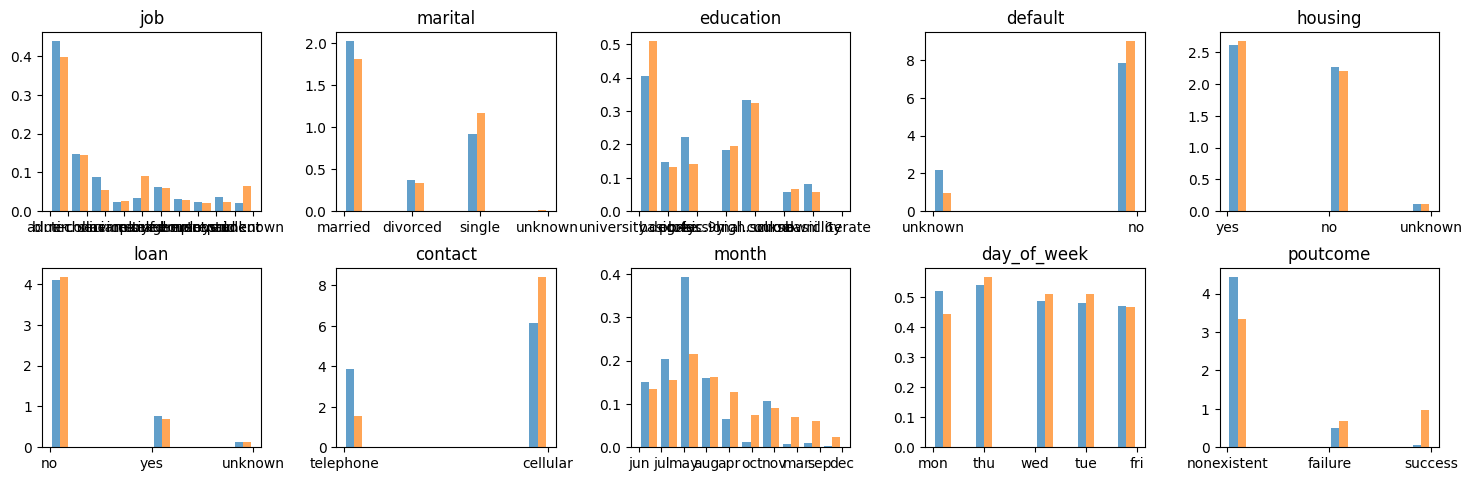

In [13]:
df_0=X_train_categorical[y_train==0] # records wih target==0
df_1=X_train_categorical[y_train==1] # records wih target==1

fig, axes = plt.subplots(2, 5,figsize=[15,5])
axes = axes.flatten()
fig.tight_layout(pad=2)

i=0
for x in X_train_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True, alpha=.7)
    plt.title(x)
    i+=1
plt.show()


In [14]:
from sklearn.preprocessing import OneHotEncoder
selection_categorical=['job', 'marital', 'education', 'default','contact', 'month', 'poutcome']

### Onehot encoding

In [15]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_categorical[selection_categorical])

OneHotEncoder(handle_unknown='ignore')

In [16]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 array(['failure', 'nonexistent', 'success'], dtype=object)]

In [17]:
columns_dummies=encoder.get_feature_names_out()
columns_dummies

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype=object)

In [18]:
dummies_train = encoder.transform(
    X_train_categorical[selection_categorical]).toarray()

dummies_test = encoder.transform(
    X_test_categorical[selection_categorical]).toarray()

dummies_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [19]:
dummies_train=pd.DataFrame(dummies_train,columns=columns_dummies)
dummies_test=pd.DataFrame(dummies_test,columns=columns_dummies)

In [20]:
dummies_train

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10498,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
dummies_train.shape

(10500, 41)

In [22]:
# Save the scaler
import pickle
pickle.dump(encoder, open('encoder.pkl', 'wb'))

### Numerical data

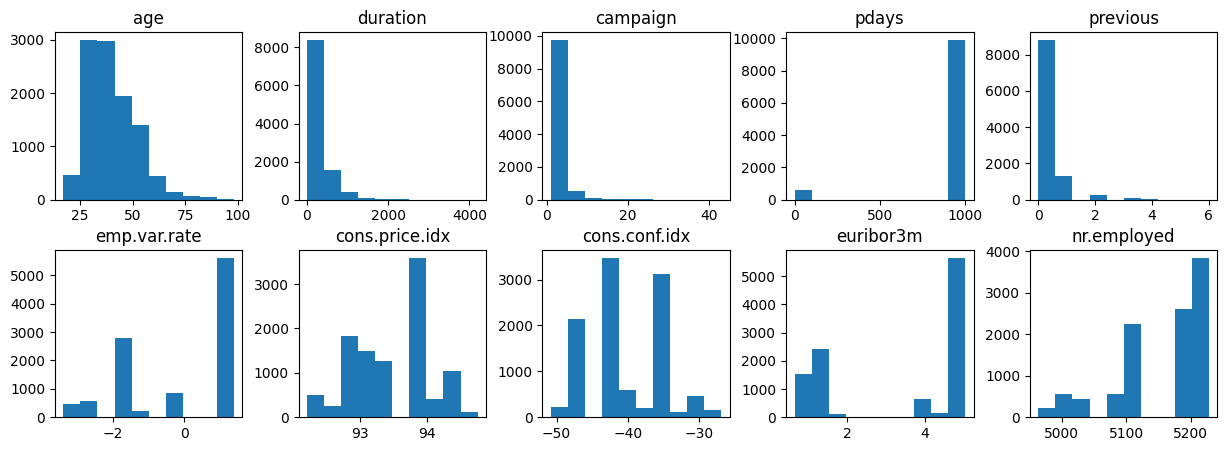

In [23]:
_ = X_train_numerical.hist(layout=(2,5), figsize=(15,5), grid=False)

In [24]:
X_train_numerical['logduration']=X_train_numerical['duration'].apply(lambda x: math.log(x+1))
X_train_numerical['logcampaign']=X_train_numerical['campaign'].apply(lambda x: math.log(x+1))
X_train_numerical['logprevious']=X_train_numerical['previous'].apply(lambda x: math.log(x+1))

X_test_numerical['logduration']=X_test_numerical['duration'].apply(lambda x: math.log(x+1))
X_test_numerical['logcampaign']=X_test_numerical['campaign'].apply(lambda x: math.log(x+1))
X_test_numerical['logprevious']=X_test_numerical['previous'].apply(lambda x: math.log(x+1))

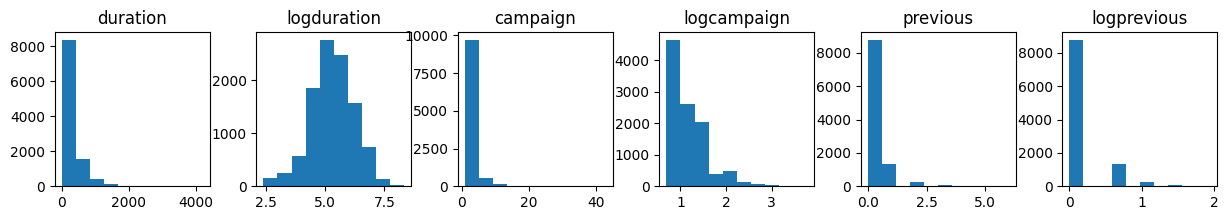

In [25]:
_ = X_train_numerical[['duration','logduration', 'campaign','logcampaign','previous','logprevious']].hist(layout=(1,6), figsize=(15,2), grid=False)

In [26]:
X_train_numerical.drop(columns=['duration','campaign','previous'],inplace=True)
X_test_numerical.drop(columns=['duration','campaign','previous'],inplace=True)

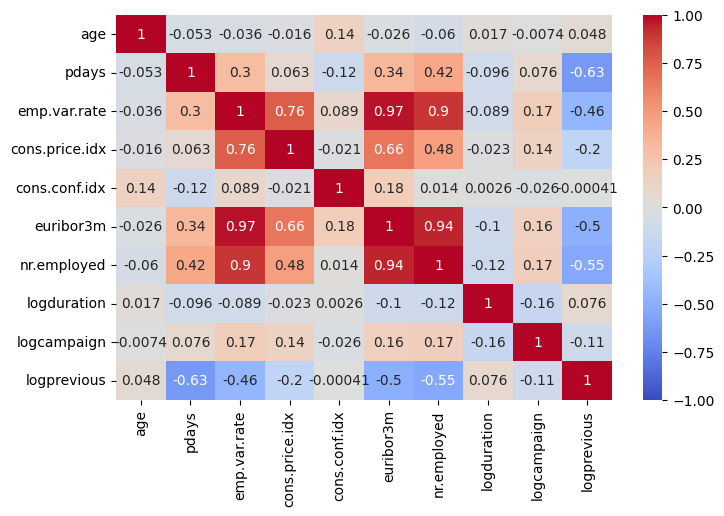

In [27]:
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(X_train_numerical.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

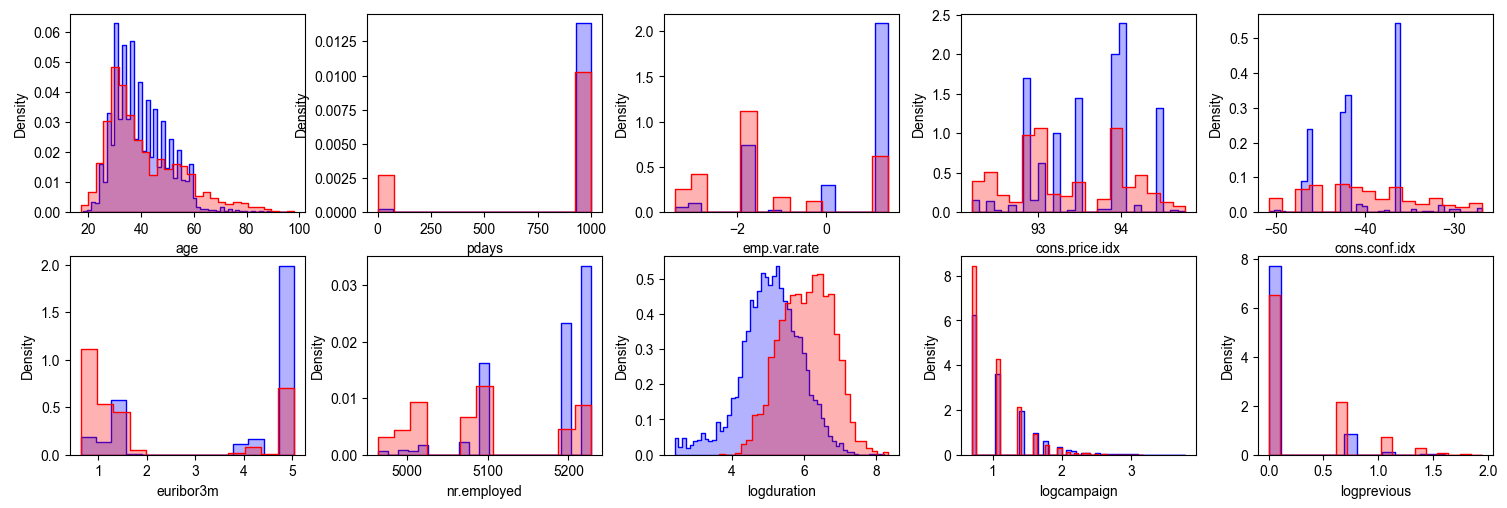

In [28]:
X0 = X_train_numerical[y_train==0]
X1 = X_train_numerical[y_train==1]


fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(15,5))
fig.tight_layout()
sns.set_style("white")

for i, ax in zip(range(X_train_numerical.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

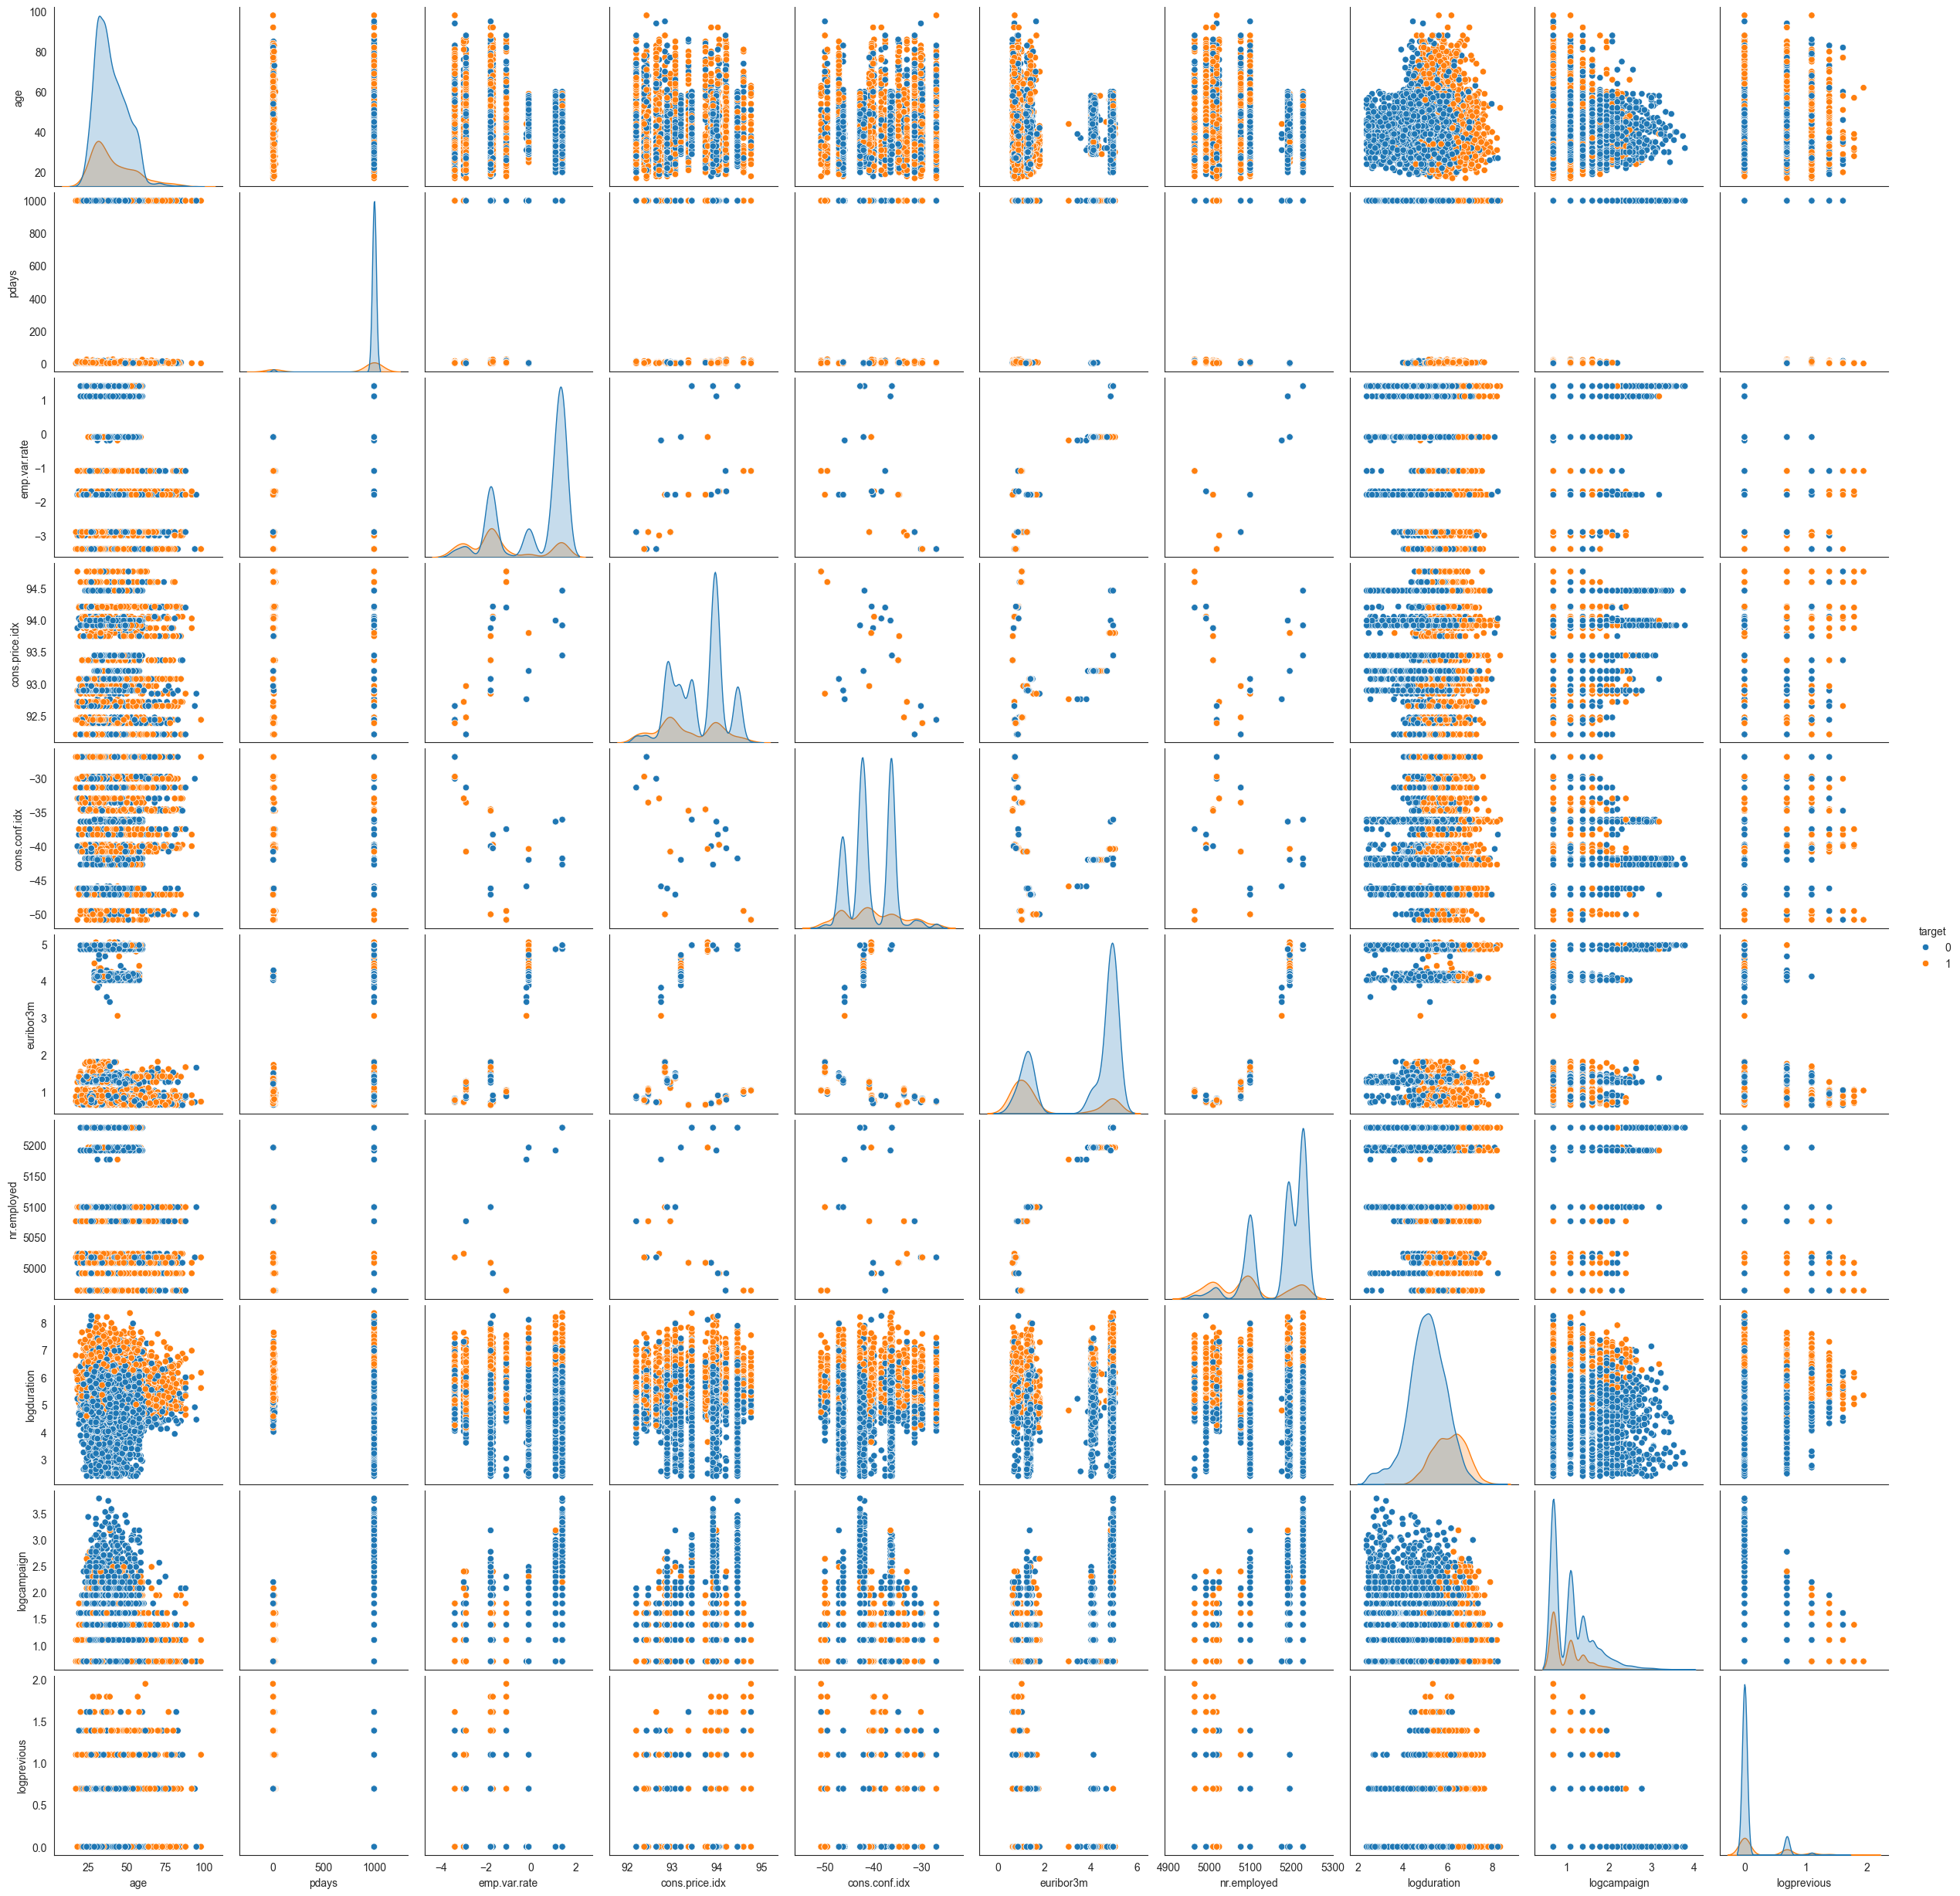

In [29]:
df_y_train=pd.DataFrame(y_train)
_ = sns.pairplot(pd.concat([X_train_numerical,df_y_train],axis=1), hue='target')

## Standarize

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler().fit(X_train_numerical) # No target
X_train_numerical_scaled=pd.DataFrame(scaler.transform(X_train_numerical))
X_test_numerical_scaled=pd.DataFrame(scaler.transform(X_test_numerical))

X_train_numerical_scaled.columns = X_train_numerical.columns
X_test_numerical_scaled.columns = X_test_numerical.columns


In [32]:
X_test_numerical_scaled.sample(3)

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logduration,logcampaign,logprevious
876,0.618190,0.250503,0.915658,-0.167268,0.889962,0.860729,0.909343,0.479260,0.596132,-0.421011
981,-0.279137,0.250503,0.007078,-0.573645,-0.319173,0.372069,0.497920,1.801800,-0.853405,-0.421011
3524,-0.368870,0.250503,0.007078,-0.573645,-0.319173,0.341769,0.497920,1.787921,-0.853405,-0.421011


In [33]:
# Save the scaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

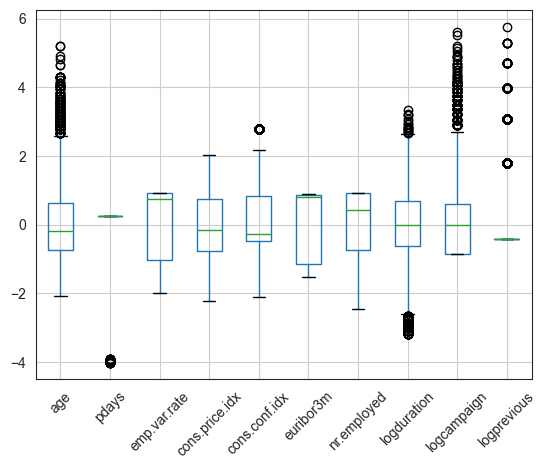

In [34]:
_=X_train_numerical_scaled.boxplot(rot=45, grid=True)

## Final datasets

In [35]:
X_train=pd.concat([dummies_train,X_train_numerical_scaled], axis=1)
X_test=pd.concat([dummies_test,X_test_numerical_scaled], axis=1)


In [36]:
X_train.sample(3)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logduration,logcampaign,logprevious
6340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.727800,0.250503,0.007078,-0.573645,-0.319173,0.414489,0.497920,-1.040841,-0.005480,-0.421011
4734,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.169526,0.250503,0.007078,-0.573645,-0.319173,0.396309,0.497920,-1.113654,-0.853405,-0.421011
10302,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.727800,0.250503,0.733942,0.748745,0.828481,0.802332,0.436779,0.052894,-0.005480,-0.421011


## Models

## KNN Model

<div style="float: right; text-align:center; width: 60%">
<figure>
    <img src="figures/KnnClassification.svg" alt="KNN cassification"/>
</figure>
<table><tr>
<td> <img src="figures/knn_3.png" alt="K=1" style="width: 350px;"/>
    <figcaption><small>K=1</small></figcaption>  </td>
<td> <img src="figures/knn_2.png" alt="K=20" style="width: 350px;"/>
    <figcaption><small>K=20</small></figcaption>  </td>
<td> <img src="figures/knn_1.png" alt="K=100" style="width: 350px;"/>
    <figcaption><small>K=100</small></figcaption>  </td>
</tr></table>
</div>

The k-nearest neighbors (KNN) algorithm approximates the association between independent variables and the outcome by a majority counting amont observations in the same neighbourhood. 

The size of the neighbourhood is an hyperparameter of the model. It is a non-parametric algorithm that doesn't make assumptions about the underlying data distribution.



**Main Parameters**

- `n_neighbors` : Number of neighbors.

- `weights` : Weight function used in prediction {'uniform', 'distance'}

- `p` : Power parameter for the Minkowski metric.

-  `metric` : Metric to use for distance computation. 

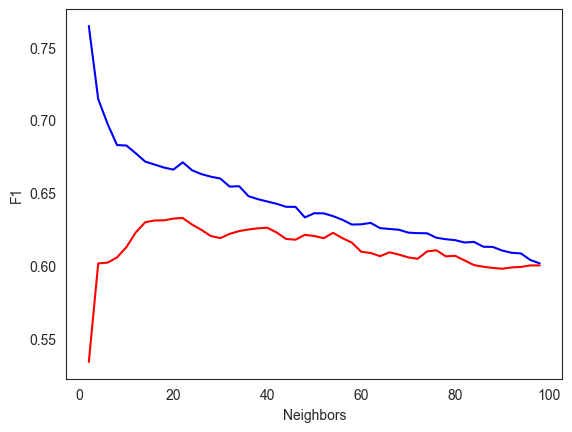

In [37]:
from sklearn.neighbors import KNeighborsClassifier

score_train=[]
score_test=[]

neighbors=range(2,100,2)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    score_train.append( metrics.f1_score(y_train, y_pred_train))
    score_test.append( metrics.f1_score(y_test, y_pred_test))

plt.xlabel('Neighbors')
plt.ylabel('F1')
plt.plot (neighbors,score_train, color='blue', alpha=1.00)
plt.plot (neighbors,score_test, color='red', alpha=1.00)

plt.show()

In [38]:
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,200,20)}

We create a function to perform and evaluate our GridSearch

In [39]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, 
                      parameters, 
                      cv=3, 
                      scoring = 'f1', 
                      verbose=0, 
                      n_jobs=-1
                      )
    tic = time.perf_counter()
    gs = gs.fit(X_train, y_train)
    toc = time.perf_counter()

    print("f1_train: %f using %s in %.3f seconds" % (gs.best_score_, gs.best_params_,toc - tic))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    #EVALUATE OUR PREDICTION
    print("           train    test ") 
    print("-------------------------") 
    print("f1         %.3f    %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("accuracy   %.3f    %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) )) 
    print("precision  %.3f    %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("recall     %.3f    %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) )) 
    print("")
    
    #print(confusion_matrix(y_test, y_pred))
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))         # Sample figsize in inches
    sns.set_style("whitegrid")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", ax=ax1); #annot=True to annotate cells fmt: format
    
    _=RocCurveDisplay.from_estimator(gs.best_estimator_, X_test, y_test, ax=ax2)
    
    plt.tight_layout()
    plt.show()

    return gs.best_estimator_

### Classification quality metrics
<div style="float: left; text-align:center; width: 35%">
<figure>
    <img src="figures/confusion_matrix.png" alt="Confusion matrix"/>
</figure>
</div>

- Precision = $\frac{TP}{TP+FP}$
    "proportion of true positives among **positive predictions**"
  
- False Positive rate = $\frac{FP}{FP+TN}$ 
    "proportion of false positives among  **actual negatives**"

- Recall (True Positive rate)=$\frac{TP}{FN+TP}$ 
    "proportion of true positives among **actual positive**"
  
- F-score=$(\beta^2+1)\frac{1}{(\beta^2/\text{Recall})+ 1/\text{Precision}}$


<div style="float: left; text-align:center; width: 40%">
<figure>
    <img src="figures/ROC.png" alt="ROC-AUC"/>
</figure>
</div>

- If we accepting even with small probability then $TPR= FPR =1$

- If we accepting just with high probability then $TPR= FPR = 0$

- The perfect classificator is the the point $(0,1)$

- $AUC\in [0.5,1]$  area under the curve is  a quality measure of our algorithm.

f1_train: 0.617999 using {'n_neighbors': 30} in 7.918 seconds
           train    test 
-------------------------
f1         0.660    0.619
accuracy   0.863    0.848
precision  0.765    0.731
recall     0.580    0.537



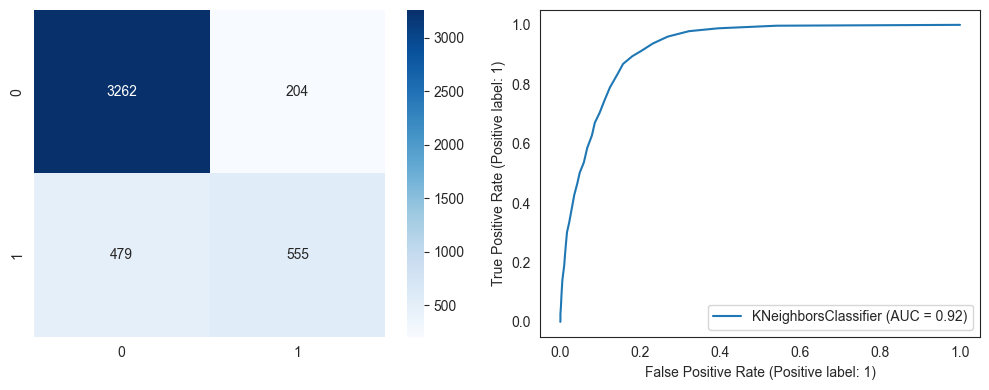

In [40]:
best_knn = hyperp_search(classifier,parameters)

## Decision Tree Classifier Model

<div style="float: right; text-align:center; width: 40%">
<figure>
    <img src="figures/diabetes_scatter.png" alt="Tree partitions"/>
</figure>
<figure>
    <img src="figures/diabetes_tree.png" alt="Classification Tree"/>
</figure>
</div>

Decision tree creates a model represented as a tree-like structure. It splits the data based on different features and their values, using a set of rules to make decisions. Each internal node represents a feature, each branch represents a decision based on a feature's value, and each leaf node represents a target variable or a class label.
A tree can be seen as a piecewise constant approximation.


**Main Parameters**

- `criterion`{“gini”, “entropy”, “log_loss”} The function to measure the quality of a split. 

- `max_depth` The maximum depth of the tree.

- `min_samples_split` : The minimum number of samples required to split an internal node.

- `min_samples_leaf` : The minimum number of samples required to be at a leaf node.

- `max_features` : The number of features to consider when looking for the best split.




f1_train: 0.737328 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20} in 3.733 seconds
           train    test 
-------------------------
f1         0.752    0.736
accuracy   0.885    0.877
precision  0.748    0.725
recall     0.757    0.748



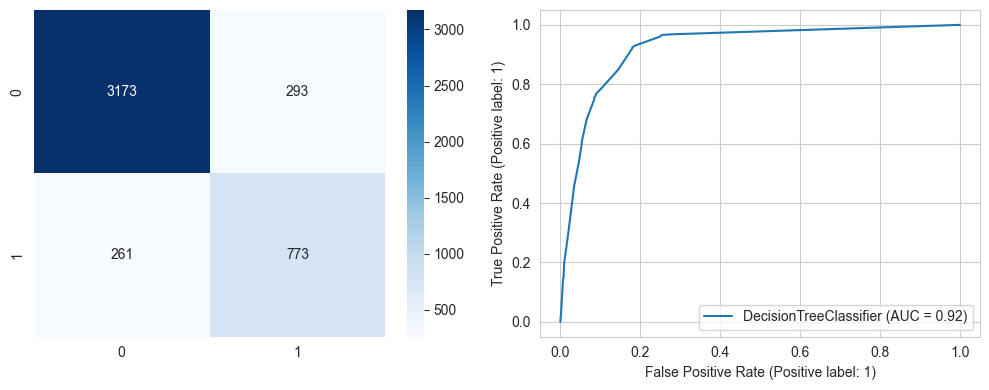

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,6,8,10],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [5,10,20]}

best_tree=hyperp_search(classifier,parameters)

#### Plotting the tree 

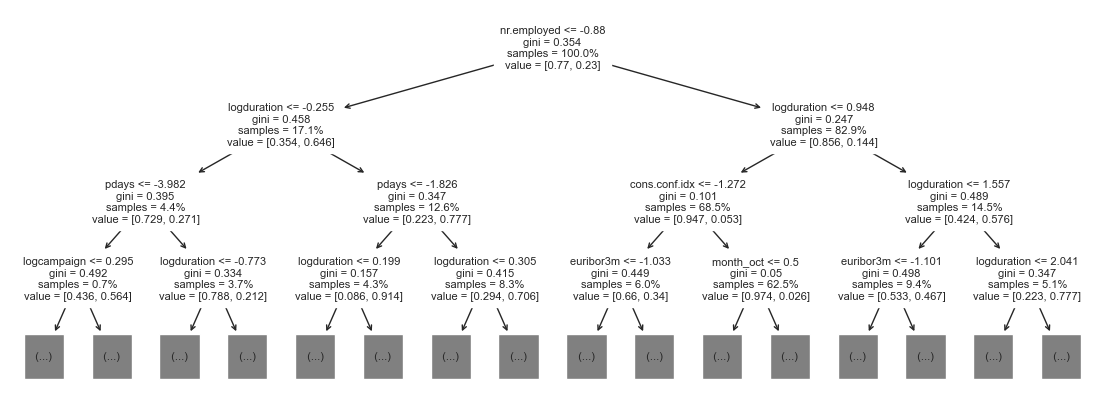

In [42]:
from sklearn import tree
#r = tree.export_text(best_tree,feature_names=X_test.columns.tolist(),max_depth=2)
#print(r)
plt.figure(figsize=(14,5))
tree.plot_tree(best_tree,  max_depth=3, feature_names=X_test.columns.tolist(),fontsize=8,proportion=True)
plt.show()


## Naive Bayes

 - Bayes Theorem
 $$p(y|\textbf{x}) = \frac{p(\textbf{x}|y)p(y)}{p(\textbf{x})} = \frac{p(\textbf{x}|y)p(y)}{\sum_{i=1}^H p(\textbf{x}|y_i)p(y_i)} $$
 
 
 - Maximum a posteriory hypotesis
 $$y_{MAP} = \arg \max_{y \in H} P(y|\textbf{x}) = \arg \max \frac{p(\textbf{x}|y)p(y)}{\sum_{i=1}^H p(\textbf{x}|y_i)p(y_i)} $$
 
 
 - Independence (naive)
$$P(\textbf{x}|y) = P(x_1|y)P(x_2|y)...P(x_n|y)=\prod_{j=1}^n P(x_j|y)$$


 - Categorical/discrete attributes
 $$P(x_j|y) = P(x_j = r_{jk} | y = v_n) $$
empirical frequency of the observed class $v_n$
 
 
 - Numerical attribute
  $$P(x_j|y) \sim N(\mu_{jh}, \sigma_{jh}^2) $$
assuming Gaussian density with empirical parameters 

           train    test 
-------------------------
f1         0.602    0.519
accuracy   0.846    0.804
precision  0.741    0.593
recall     0.507    0.461



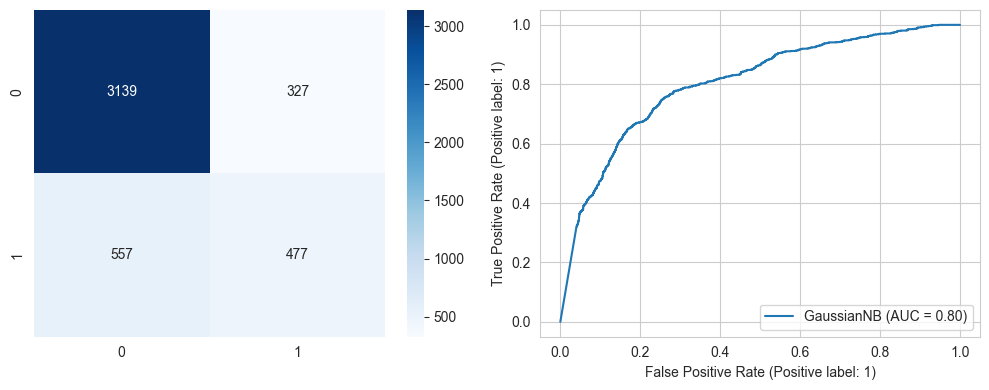

In [43]:
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

NB_model = GaussianNB()
parameters={}

NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)

#EVALUATE OUR PREDICTION
print("           train    test ") 
print("-------------------------") 
print("f1         %.3f    %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
print("accuracy   %.3f    %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) )) 
print("precision  %.3f    %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
print("recall     %.3f    %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) )) 
print("")

#print(confusion_matrix(y_test, y_pred))
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))         # Sample figsize in inches
    
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", ax=ax1); #annot=True to annotate cells fmt: format
    
_=RocCurveDisplay.from_estimator(NB_model, X_test, y_test, ax=ax2)
    
plt.tight_layout()

plt.show()

## Logistic Regression

The **logarithm of the odds of success** for a dichotomous random variable is a linear function of the explanatory features 

<div style="float: right; text-align:center; width: 35%">
<figure>
    <img src="figures/sigmoid.png" alt="Signoid function"/>
</figure>
</div>

$$
    \begin{align}
      \log\frac{P(y=1|x)}{P(y=0|x)}&=w_0+w_1 x_1+ \cdots + w_n x_n\\
      &=w^\top x
    \end{align}
$$
$$
  P(y=1|x)= \sigma(wx)=\frac{e^{w x}}{1+e^{w x}}
$$

  $$\text{Loss}(x,y,w)=\min_{w} \underbrace{\frac{1}{2}||w||^2}_{\text{regularization}} + C\, \sum_{i=1}^n \log(1+\exp(- y_i \,(w^T x_i))) $$

**Main Parameters**
- `C`: Inverse of regularization strength
- Resolution algorithm parameters:
  - `solver`: lbfgs, newton-cg, liblinear, sag, saga.
  - `tol`: Tolerance for stopping criteria.
  - `max_iter`: max. number of iterations 
  - `n_jobs`:  Number of CPU cores
  -  `penalty` : ‘l1’, ‘l2’, ‘elasticnet’

f1_train: 0.711660 using {'C': 1000, 'max_iter': 5000} in 1.480 seconds
           train    test 
-------------------------
f1         0.719    0.714
accuracy   0.878    0.874
precision  0.765    0.745
recall     0.678    0.685



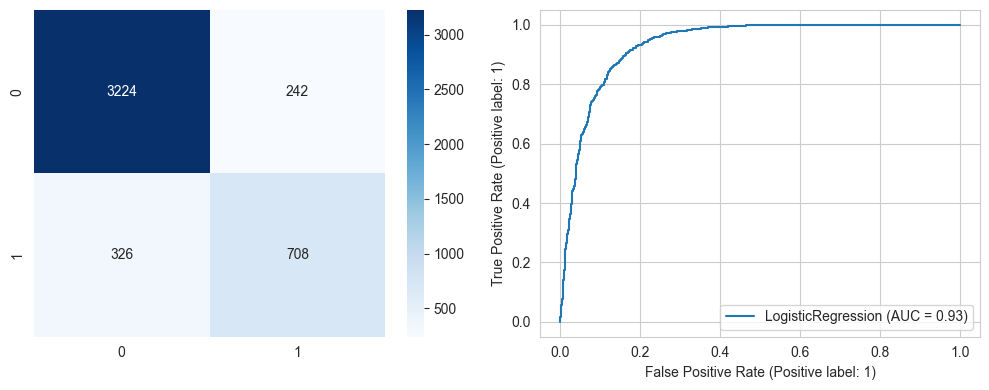

In [44]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1,10,1000], "max_iter":[5000] }

best_log = hyperp_search(classifier,parameters)

In [45]:
coeff = pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=best_log.coef_[0]

coeff.sort_values(by=['w'], inplace=True)
coeff[:10]

,feature,w
43,emp.var.rate,-4.298701
32,month_jun,-1.200781
35,month_nov,-1.106480
34,month_may,-0.925664
38,poutcome_failure,-0.726894
27,contact_telephone,-0.637780
28,month_apr,-0.489021
25,default_unknown,-0.452336
2,job_entrepreneur,-0.450106
13,marital_married,-0.406106


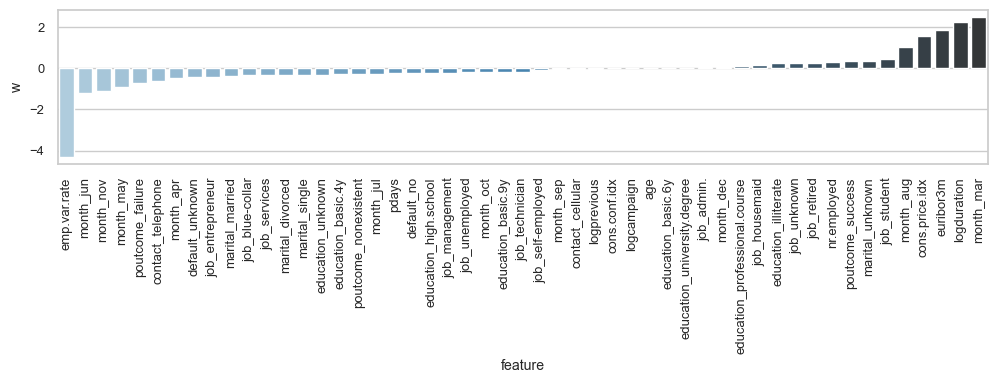

In [46]:
sns.set(rc={'figure.figsize':(12,2)}, font_scale=.85)
sns.set_style("whitegrid")
plt.xticks(rotation=90)
coeff_bar=sns.barplot(data=coeff, x="feature", y="w", palette="Blues_d", hue="feature", orient="v",legend=False)


## SVM

<div style="float: right; text-align:center; width: 40%">
<figure>
    <img src="figures/svm.png" alt="SVC"/>
</figure>
<figure>
    <img src="figures/kernels.png" alt="Example of the kernel use"/>
</figure>
</div>

$$
\begin{align}
    \min_ {w,  b, d}\qquad &\frac{1}{2} ||w||^2  + C\sum_{i=1}^{m} d_i\\
    \text {subject to } \quad & y_i (w^T \underbrace{\phi (x_i)}_{\text{kernel}} - b) \geq 1 - d_i,\\ 
      & d_i \geq 0
\end{align}
$$

**Main Parameters**
- $C$: inverse of regularization strength
- kernel:  $\phi$ is the kernel map that can be chosen as 
    - linear: $\langle x, x'\rangle$
    - poly: $(\gamma \langle x, x'\rangle + r)^d$ where $\gamma,\, d ,\, r$ are specified by keyword gamma, degree and coef0 respectively.
    - rbf - radial basis function: $\exp(-\gamma \|x-x'\|^2)$
    - neural networks (sigmoid): $\tanh(\gamma \langle x,x'\rangle + r)$
    - degree($d$), gamma($\gamma$), coef0($r$)
- Resolution algorithm parameters


f1_train: 0.717642 using {'C': 100, 'kernel': 'linear'} in 88.350 seconds
           train    test 
-------------------------
f1         0.729    0.722
accuracy   0.880    0.876
precision  0.760    0.748
recall     0.701    0.697



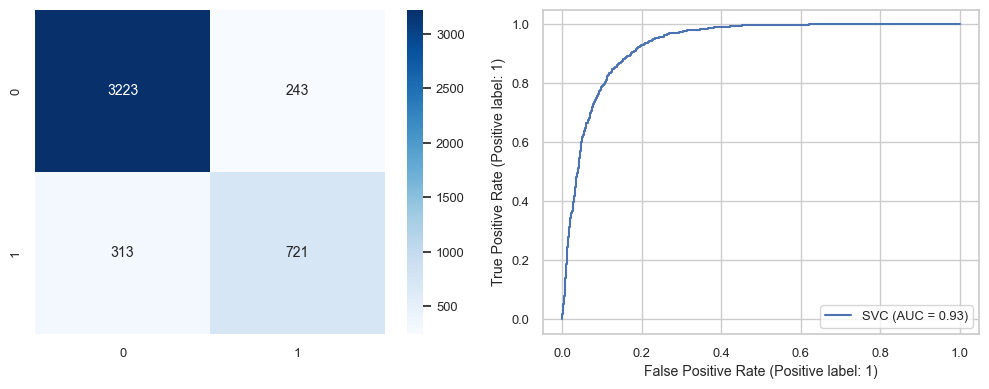

In [47]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

best_svm = hyperp_search(classifier,parameters)

## Multi-layer Perceptron classifier

The multi-layer perceptron (MLP), mostly known as **feedforward artificial neural network** is a type of neural network commonly used for supervised tasks. 
It consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of nodes or neurons that connect the neurons from the previous layer to those in the next layer. 
In an MLP for classification, the number of neurons in the output layer equals the number of classes in the target variable, each of them quantifies the probability of belonging to that class.

Each neuron in the MLP receives inputs from the previous layer, applies an activation function to compute its output, and passes it as input to the neurons in the next layer.  Typical activation functions used in regression MLPs include sigmoid, tanh, or ReLU.

During training phase, the weights and biases of the neurons are adjusted based on the difference between the predicted output and the true output; this adjustment is done using an optimization algorithm to minimize this difference.

<div style="float: left; text-align:center; width: 50%">
<figure>
    <img src="figures/neural_network.png" alt="Neural Network"/>
</figure>
    </div>
    <div style="float: right; text-align:center; width: 50%">
<figure>
    <img src="figures/neural_networks_2.png" alt="Neural Network weights"/>
</figure>
</div>

f1_train: 0.735619 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000} in 44.740 seconds
           train    test 
-------------------------
f1         0.780    0.737
accuracy   0.898    0.876
precision  0.769    0.716
recall     0.792    0.759



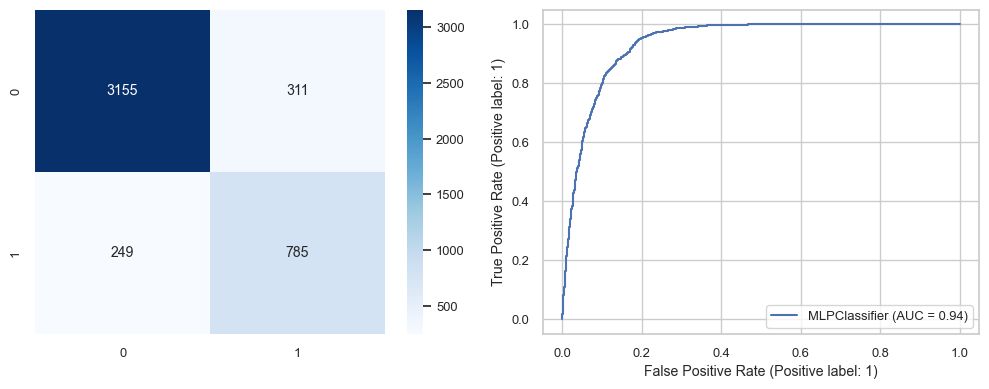

In [48]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

best_mlp = hyperp_search(classifier,parameters)

## Random Forest


Bagging methods involve training multiple models on different subsets of the training data. The subsets are created by sampling the training data with replacement, meaning that some instances may appear in multiple subsets while others may not appear at all. Each weak model in the ensemble is trained independently, and their predictions are combined through averaging (for regression) or voting (for classification) to create a strong model. Bagging helps reduce overfitting and improve generalization by introducing diversity among the models.

<div style="float: left; text-align:center; width: 50%">
<figure>
    <img src="figures/bagging.png" alt="Bagging"/>
</figure>
</div>

1. Create different (simple) tree models (stumps)
2. Each model is created with a subset of observation/features ($\sim$2m/3)
3. We combine the prediction of all trees 

**Main Parameters**

- `n_estimators`: Number of trees 
- `max_features`: Number of features selected for the split
- `bootstrap=False`: Use all samples
- `Tree parameters` 

f1_train: 0.740154 using {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100} in 38.095 seconds
           train    test 
-------------------------
f1         0.934    0.731
accuracy   0.970    0.876
precision  0.955    0.732
recall     0.914    0.729



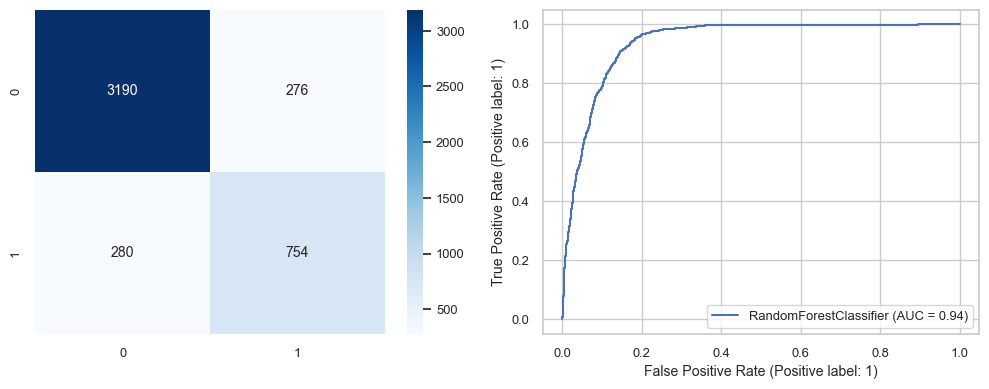

In [49]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
param_RF = {'criterion': ['entropy','gini'],
              'n_estimators' : [50, 100],
              'max_depth': range(2,20)
           }

best_rf = hyperp_search(RF,param_RF)

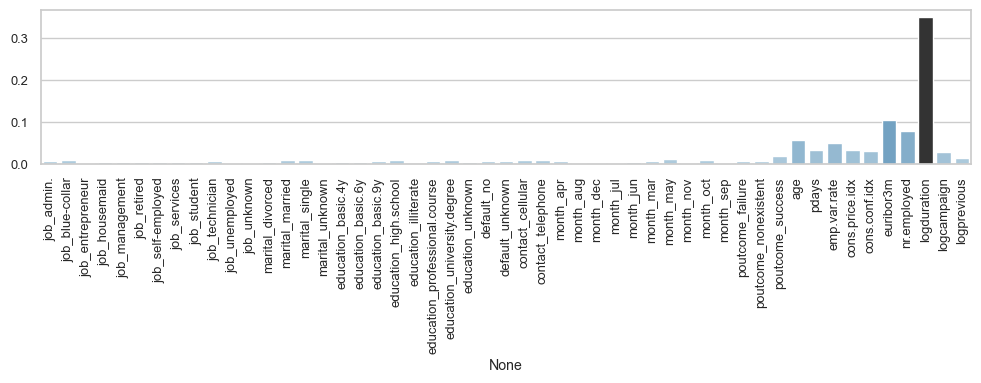

In [50]:
sns.set(rc={'figure.figsize':(12,2)}, font_scale=.85)
sns.set_style("whitegrid")
plt.xticks(rotation=90)
coeff_bar=sns.barplot(y=best_rf.feature_importances_, x=X_train.columns, palette="Blues_d", hue=best_rf.feature_importances_, orient="v",legend=False)

## AdaBoost


<div style="float: right; text-align:center; width: 40%">
<figure>
    <img src="figures/adaboost.png" alt="Tree partitions"/>
</figure>
</div>

1. Assign equal weights to observations $w_i^{(0)}=1/m$
2. For $k=1,\ldots,K$ 
    - Select a sample of observations based on the weights.  
    - Create the $k$-th weak learner and compute predictions $x^{(k)}$
    - Compute the model \**weighted** error  and assign its coefficient:  $$\alpha^{(k)}=\lambda\times\log((1-error)/error)$$
    - Update sample weights: $$w_i^{(k+1)} \propto w_i^{(k)} \times \exp(-\alpha^{(k)}y_i\hat x_i^{(k)}) $$ 
3. Final weighted prediction  

**Main Parameters**
- `n_estimators`: Number of estimators ($K$) 
- `base_estimator`: Weak estimator type 
- `learning_rate`: weights of estimator in final decision ($\lambda$) 

f1_train: 0.689566 using {'learning_rate': 0.5, 'n_estimators': 30} in 1.043 seconds
           train    test 
-------------------------
f1         0.701    0.703
accuracy   0.874    0.873
precision  0.770    0.762
recall     0.643    0.653



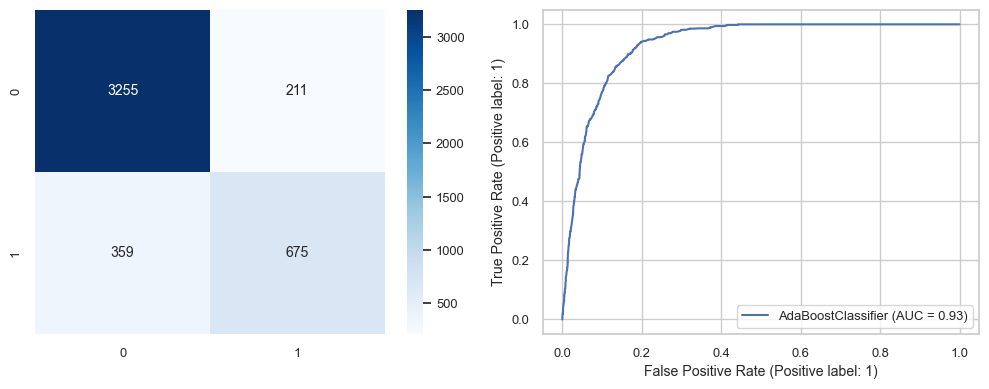

In [51]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
parameters = {"n_estimators":[10,30],
            "learning_rate":[0.5,1.0]}

best_ada = hyperp_search(classifier,parameters)

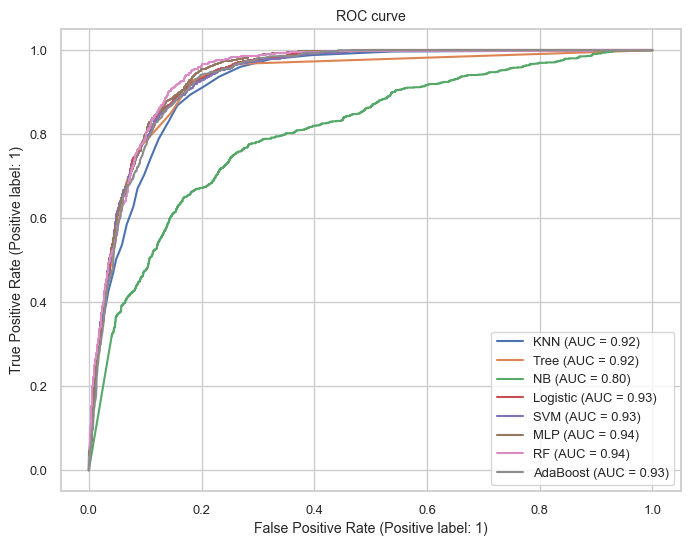

In [52]:
sns.set(rc={'figure.figsize':(8,6)}, font_scale=.85)
sns.set_style("whitegrid")

fig, ax = plt.subplots()
models = [
    ("KNN", best_knn),
    ("Tree", best_tree),
    ("NB", NB_model),
    ("Logistic", best_log),
    ("SVM", best_svm),
    ("MLP", best_mlp),
    ("RF", best_rf),
    ("AdaBoost", best_ada),
]

model_displays = {}
for name, model in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        model, X_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")

## Save the model

In [53]:
import pickle

In [54]:
pickle.dump(best_tree, open('tree_model.pkl', 'wb'))

## Making predictions

In [55]:
# load scaler modand el
loaded_encoder = pickle.load(open('encoder.pkl', 'rb'))
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_model = pickle.load(open('tree_model.pkl', 'rb'))

In [56]:
df_new = pd.read_csv('data/telemarketing_pred_withtarget.csv')

In [57]:
df_new_categorical=df_new.select_dtypes(include=['object'])

# Categorical
dummies_new = loaded_encoder.transform(df_new[selection_categorical]).toarray()

columns_dummies=loaded_encoder.get_feature_names_out()
dummies_new =pd.DataFrame(dummies_new,columns=columns_dummies)

# Numerical
df_new_numerical=df_new.select_dtypes(include=[np.number])

df_new_numerical['logduration']=df_new_numerical['duration'].apply(lambda x: math.log(x+1))
df_new_numerical['logcampaign']=df_new_numerical['campaign'].apply(lambda x: math.log(x+1))
df_new_numerical['logprevious']=df_new_numerical['previous'].apply(lambda x: math.log(x+1))

df_new_numerical.drop(columns=['duration','campaign','previous','target'],inplace=True)
df_new_numerical

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logduration,logcampaign,logprevious
0,27,999,-1.8,92.893,-46.2,1.266,5099.1,5.442418,1.609438,0.693147
1,35,999,-1.8,93.075,-47.1,1.405,5099.1,5.407172,0.693147,0.000000
2,39,999,1.1,93.994,-36.4,4.856,5191.0,5.777652,1.386294,0.000000
3,34,999,1.4,93.444,-36.1,4.965,5228.1,4.234107,1.386294,0.000000
4,51,999,-1.8,92.893,-46.2,1.299,5099.1,5.549076,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...
4995,29,999,-0.1,93.200,-42.0,4.076,5195.8,4.605170,1.098612,0.000000
4996,48,999,1.4,94.465,-41.8,4.864,5228.1,4.234107,1.945910,0.000000
4997,40,999,-0.1,93.200,-42.0,4.153,5195.8,4.875197,0.693147,0.000000
4998,27,999,-1.8,92.893,-46.2,1.244,5099.1,3.526361,1.791759,0.000000


In [58]:
# Scaling - WE MUST USE THE SAME SCALING OF THE TRAIN!
scaled_df_new = pd.DataFrame(loaded_scaler.transform(df_new_numerical))
scaled_df_new.columns = df_new_numerical.columns

# Feature selection
X2=pd.concat([dummies_new,scaled_df_new], axis = 1)

In [59]:
X2.sample(3)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,logduration,logcampaign,logprevious
514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.368870,0.250503,-1.688936,-2.237459,1.853171,-1.392505,-1.025494,0.138058,-0.00548,1.784240
3545,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.099672,0.250503,0.915658,1.533186,-0.278185,0.858525,0.909343,0.667205,-0.00548,-0.421011
1486,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.079794,0.250503,-1.991796,-1.941003,2.181072,-1.434374,-1.773189,1.519052,-0.00548,1.784240


In [60]:
y_tree_predictions = loaded_model.predict(X2)

In [61]:
y2=df_new.target
print("f1: ", f1_score(y2,y_tree_predictions))
print(confusion_matrix(y2,y_tree_predictions))
print(classification_report(y2,y_tree_predictions))

f1:  0.7635447291054179
[[3528  280]
 [ 283  909]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3808
           1       0.76      0.76      0.76      1192

    accuracy                           0.89      5000
   macro avg       0.85      0.84      0.84      5000
weighted avg       0.89      0.89      0.89      5000



## Model Interpretation

<div style="float: center; text-align:center; width: 100%">
<figure>
    <img src="figures/wolf_3.png" alt="example explainability"/>
</figure>
</div>

In [ ]:
import shap
# compute SHAP values
shap.initjs()

X_train_summary = shap.sample(X_train, 10)

explainer = shap.KernelExplainer(best_mlp.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


 14%|████████████████▉                                                                                                     | 646/4500 [03:59<21:22,  3.00it/s]

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline

In [ ]:
shap_values

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=list(X_test.columns))

In [ ]:
shap.summary_plot(shap_values,X_test , feature_names=list(X_train.columns), max_display=10)

In [ ]:
y_test[:10]

In [325]:
i = 8
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i], feature_names = list(X_train.columns))